# LSTM for Regression with Time Steps

You may have noticed that the data preparation for the LSTM network includes time steps. 

Some sequence problems may have a varied number of time steps per sample. For example, you may have meausrements of a physical machine leading up to a point of failure or a point of surge. Each incident would be a sample the observations that lead up to the event would be the time steps, and the variables observed would be the features. 

Time steps provide another way to phrase our time series problem. Like window example, we can take prior time steps in our time series as inputs to predict the output at the next time step. 

Instead of phrasing the past observations as separated input fetures, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem. 

We can do this using the same data representation as in the previous window-based example, except when we reshape the data, we set the columns to be the time steps dimension and chnage the features dimension back to 1. 

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [15]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("trainX shape", trainX.shape, "trainY shape", trainY.shape)
for i in range(5):
    print(trainX[i], trainY[i])

trainX shape (92, 3) trainY shape (92,)
[ 0.01544401  0.02702703  0.05405405] 0.0482626
[ 0.02702703  0.05405405  0.04826255] 0.0328185
[ 0.05405405  0.04826255  0.03281853] 0.0598456
[ 0.04826255  0.03281853  0.05984557] 0.0849421
[ 0.03281853  0.05984557  0.08494207] 0.0849421


Here trainX is in form **(samples=92, features=3)**. It can be explained that we have a **shape** described by features=3, and use this shape to predict next shape. (in the lstm in window). 

Now we will change the shape into sequence, each time step we have only 1 feature, but we have 3 steps. 

That is change from **(sample=92, feature=3)** to **(sample=92, time_steps=3, feature=1)**

In [16]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print('trainX shape', trainX.shape)
for i in range(5):
    print(trainX[i])

trainX shape (92, 3, 1)
[[ 0.01544401]
 [ 0.02702703]
 [ 0.05405405]]
[[ 0.02702703]
 [ 0.05405405]
 [ 0.04826255]]
[[ 0.05405405]
 [ 0.04826255]
 [ 0.03281853]]
[[ 0.04826255]
 [ 0.03281853]
 [ 0.05984557]]
[[ 0.03281853]
 [ 0.05984557]
 [ 0.08494207]]


### now we create LSTM network
Note: the input_dim is set back to 1, even though the look_back is 3. 
In window based and normal regression, we set input_dim = look_back, basically we use shape to predict shape. 

In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 4)             96          lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             5           lstm_1[0][0]                     
Total params: 101
Trainable params: 101
Non-trainable params: 0
____________________________________________________________________________________________________


In [18]:
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0160
Epoch 2/100
0s - loss: 0.0079
Epoch 3/100
0s - loss: 0.0070
Epoch 4/100
0s - loss: 0.0061
Epoch 5/100
0s - loss: 0.0053
Epoch 6/100
0s - loss: 0.0047
Epoch 7/100
0s - loss: 0.0043
Epoch 8/100
0s - loss: 0.0042
Epoch 9/100
0s - loss: 0.0039
Epoch 10/100
0s - loss: 0.0039
Epoch 11/100
0s - loss: 0.0039
Epoch 12/100
0s - loss: 0.0037
Epoch 13/100
0s - loss: 0.0037
Epoch 14/100
0s - loss: 0.0037
Epoch 15/100
0s - loss: 0.0037
Epoch 16/100
0s - loss: 0.0036
Epoch 17/100
0s - loss: 0.0035
Epoch 18/100
0s - loss: 0.0037
Epoch 19/100
0s - loss: 0.0038
Epoch 20/100
0s - loss: 0.0038
Epoch 21/100
0s - loss: 0.0035
Epoch 22/100
0s - loss: 0.0036
Epoch 23/100
0s - loss: 0.0036
Epoch 24/100
0s - loss: 0.0036
Epoch 25/100
0s - loss: 0.0036
Epoch 26/100
0s - loss: 0.0036
Epoch 27/100
0s - loss: 0.0036
Epoch 28/100
0s - loss: 0.0036
Epoch 29/100
0s - loss: 0.0035
Epoch 30/100
0s - loss: 0.0036
Epoch 31/100
0s - loss: 0.0035
Epoch 32/100
0s - loss: 0.0035
Epoch 33/100
0s -

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 26.86 RMSE
Test Score: 69.59 RMSE


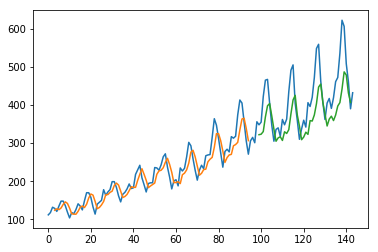

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()